# Spectra Stitch

Transform music to graphics

1. Load libraries

In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

2. Define functions

In [18]:

def load_audio(file_name):
    y, sr = librosa.load(file_name, sr=None)
    print("Length of sample: ", len(y))
    print("Sample rate: ", sr)
    return y, sr

def compute_dft_slices(y, sr, X_DIM, Y_DIM):
    n_slices = X_DIM * Y_DIM
    slice_len = len(y) // n_slices
    print("Length of slice: ", slice_len)
    slices = [y[i:i+slice_len] for i in range(0, slice_len * n_slices, slice_len)]
    print("Number of slices: ", len(slices))
    
    dft_slices = [np.abs(np.fft.fft(slice)) for slice in slices]
    print("Number of DFT slices: ", len(dft_slices))
    return dft_slices

def map_to_color(dft_slices):
    max_frequencies = [np.argmax(slice) for slice in dft_slices]
    # Normalize frequencies to [0, 1] and map to colors
    # colors = plt.cm.jet(np.array(max_frequencies) / max(max_frequencies))
    # Option to change colors
    colors = plt.cm.viridis(np.array(max_frequencies) / max(max_frequencies))
    return colors


def reshape(colors, X_DIM, Y_DIM, Y_SCALE):
    # Initial reshape
    image = np.reshape(colors, (Y_DIM, X_DIM, 4))[:, :, :3]
    
    # Multiply the height of the image by repeating rows based on Y_SCALE
    new_image = []
    for row in image:
        for _ in range(Y_SCALE):
            new_image.append(row)
    return np.array(new_image)

def main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, PDF_RESOLUTION):
    # Use load_audio function to load music file, add extension mp3
    y, sr = load_audio(MUSIC_FILE_NAME)
    dft_slices = compute_dft_slices(y, sr, X_DIM, Y_DIM)
    colors = map_to_color(dft_slices)
    # Plot image and save
    image = reshape(colors, X_DIM, Y_DIM, Y_SCALE)
    plt.imshow(image)
    plt.axis('off')
    # Save image to lossless pdf file, upscale to dpi
    plt.savefig(GRAPHICS_FILE_NAME, bbox_inches='tight', pad_inches=0, dpi=PDF_RESOLUTION)
    plt.show()
    

# import argparse
# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Generate graphics from music using DFT.")
#     parser.add_argument("MUSIC_FILE_NAME", type=str, help="Path to the music file.")
#     parser.add_argument("GRAPHICS_FILE_NAME", type=str, help="Path to save the generated graphics.")
#     parser.add_argument("X_DIM", type=int, help="Width of the generated image.")
#     parser.add_argument("Y_DIM", type=int, help="Height of the generated image.")
#     parser.add_argument("PDF_RESOLUTION", type=int, help="Resolution of the saved PDF.")
    
#     args = parser.parse_args()
    
#     main(args.MUSIC_FILE_NAME, args.GRAPHICS_FILE_NAME, args.X_DIM, args.Y_DIM, args.PDF_RESOLUTION)

3. Run on select samples

Length of sample:  8919040
Sample rate:  44100
Length of slice:  3567
Number of slices:  2500
Number of DFT slices:  2500


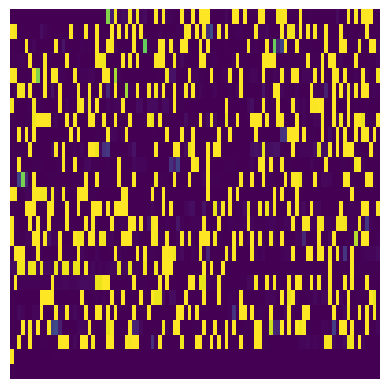

In [19]:
# Write code that uses above functions to create a spectrogram image from a music file
# Use the following parameters:
MUSIC_FILE_NAME = 'Samples/sample_1.mp3'
GRAPHICS_FILE_NAME = 'Outputs/sample_1_output_2.pdf'
X_DIM=100
Y_DIM=25
Y_SCALE=4
PDF_RESOLUTION=3000
# Run main function, pass file names under subfolers 'Samples' and 'Outputs'
main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, PDF_RESOLUTION)
